#==================================
# Task-1:- Data Cleaning Processing
#==================================

In [17]:
#=================================
# Data Cleaning & Preprocessing
# ================================

import pandas as pd

# 1. Load Dataset
column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]

df = pd.read_csv("4_house.csv", 
                 sep=r"\s+", 
                 header=None, 
                 names=column_names)

# 2. Display Basic Information
print("Initial Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# 3. Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 4. Check Missing Values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# 5. Handle Missing Values
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 6. Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# 7. Standardize Categorical Text Format
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# 8. Final Check
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

print("\nFinal Shape After Cleaning:", df.shape)

# 9. Save Cleaned Dataset
df.to_csv("cleaned_house_data.csv", index=False)

print("\nData Cleaning Completed Successfully ✅")

Initial Shape: (506, 14)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Missing Values Before Cleaning:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0

#==================================
# Tas-2:- Exploratory Data Analysis
#==================================

In [18]:
#Step 1: Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Step 2: Load Cleaned Dataset

df = pd.read_csv("cleaned_house_data.csv")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (506, 14)
      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [20]:
#Step 3: Summary Statistics
#✅ For Numerical Columns

print("\nSummary Statistics (Numerical):")
print(df.describe())


Summary Statistics (Numerical):
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.6740

In [21]:
#Mean, Median, Mode, Standard Deviation

print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Mean:
 crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
medv        22.532806
dtype: float64

Median:
 crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
b          391.44000
lstat       11.36000
medv        21.20000
dtype: float64

Mode:
 crim         0.01501
zn           0.00000
indus       18.10000
chas         0.00000
nox          0.53800
rm           5.71300
age        100.00000
dis          3.49520
rad         24.00000
tax        666.00000
ptratio     20.20000
b          396.90000
lstat        6.36000
medv        50.00000
Name: 0, dtype: float64

Standard Deviation:
 cr

In [22]:
#Step 4: Check Data Types

print("\nData Types:")
print(df.dtypes)


Data Types:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


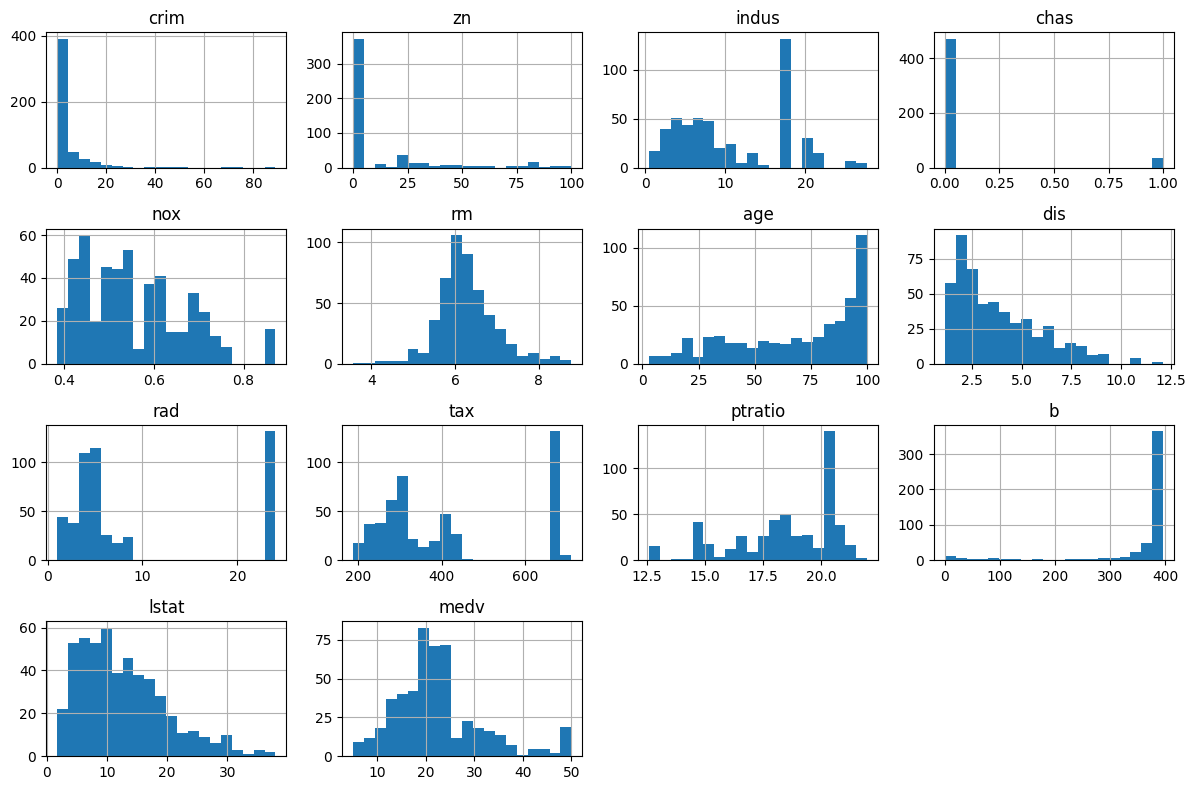

In [23]:
#Step 5: Visualize Data Distributions
#📊 1. Histogram (Distribution of Numerical Features)

df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

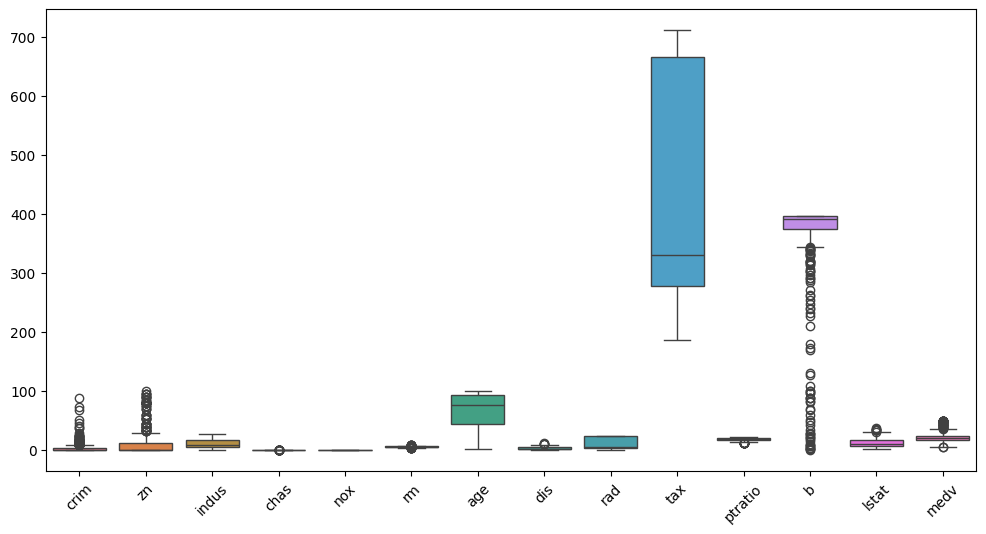

In [24]:
#2. Boxplot (Detect Outliers)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=45)
plt.show()

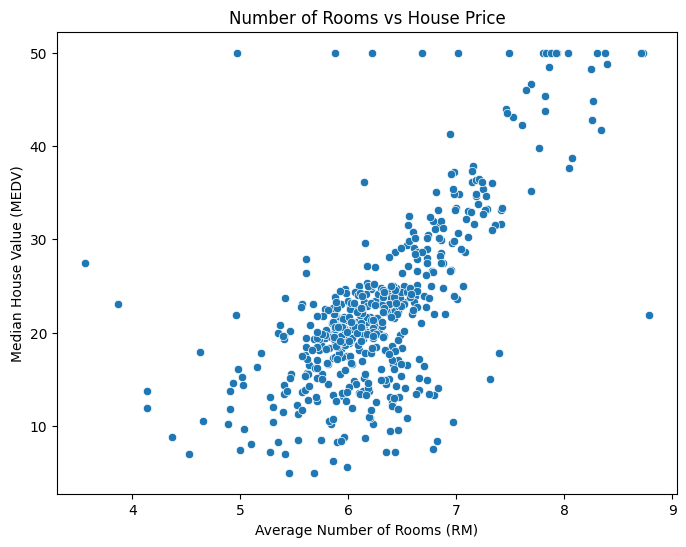

In [25]:
#3. Scatter Plot (Example: Area vs Price)
#(Replace column names if needed according to dataset)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['rm'], y=df['medv'])
plt.title("Number of Rooms vs House Price")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Value (MEDV)")
plt.show()

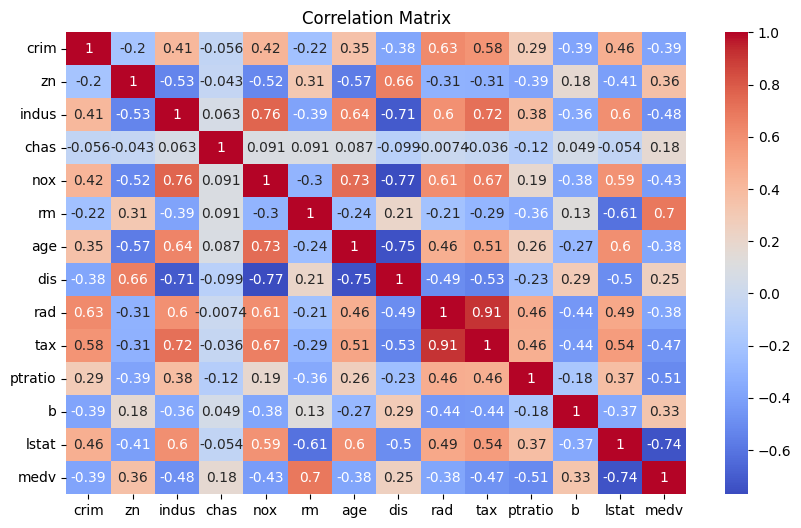

In [26]:
#Step 6: Correlation Between Numerical Features

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Level 1-Task 3: Basic Data Visualization

In [27]:
#Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Step 2: Check Columns
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='str')


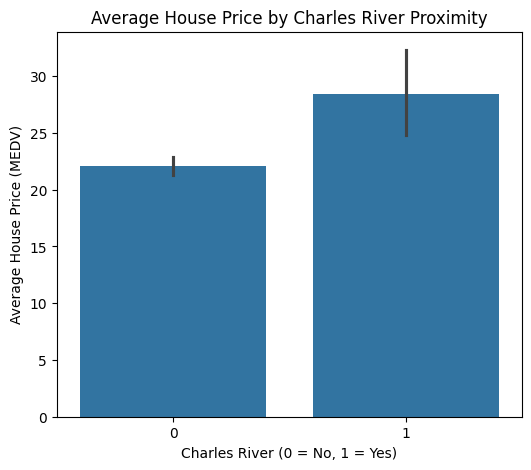

In [29]:
#Step 3: Bar Plot
#🎯 Example: Average House Price by CHAS (Near River or Not)

plt.figure(figsize=(6,5))
sns.barplot(x=df['chas'], y=df['medv'])
plt.title("Average House Price by Charles River Proximity")
plt.xlabel("Charles River (0 = No, 1 = Yes)")
plt.ylabel("Average House Price (MEDV)")
plt.show()

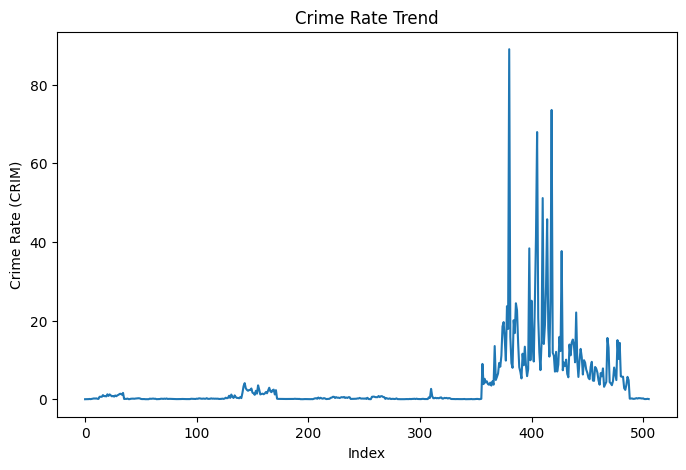

In [30]:
#Step 4: Line Chart
#🎯 Example: Crime Rate Trend (Index Wise)

plt.figure(figsize=(8,5))
plt.plot(df['crim'])
plt.title("Crime Rate Trend")
plt.xlabel("Index")
plt.ylabel("Crime Rate (CRIM)")
plt.show()

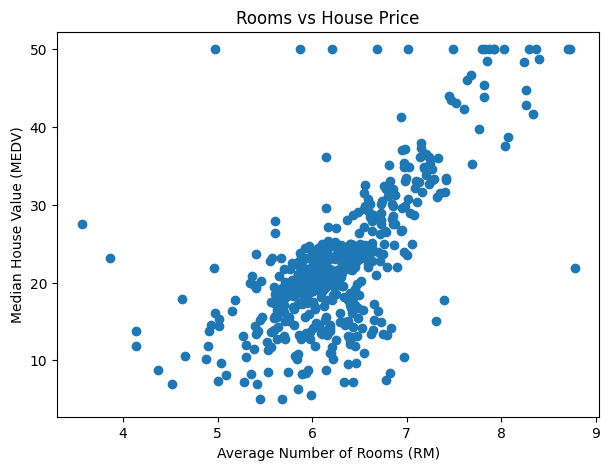

In [31]:
#Step 5: Scatter Plot
#🎯 Rooms vs House Price

plt.figure(figsize=(7,5))
plt.scatter(df['rm'], df['medv'])
plt.title("Rooms vs House Price")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Value (MEDV)")
plt.show()